In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gc
import fpfs
import pltutil
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [7]:
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim')
assert os.path.isdir(simDir)
galDir=os.path.join(simDir,'galaxy_basic3Shift_psf60')
assert os.path.isdir(galDir)

In [18]:
ngrid       =   64
pixScale    =   0.168
psfFWHM     =   60 # arcsec

# FPFS Basic
beta        =   0.50 # try2
rcut        =   16   #max(min(int(psfFWHMF/pixScale*4+0.5),15),12)
beg         =   ngrid//2-rcut
end         =   beg+2*rcut
# PSF
psfFname    =   os.path.join(galDir,'psf-%s.fits' %psfFWHM)
psfData     =   pyfits.open(psfFname)[0].data
npad        =   (ngrid-psfData.shape[0])//2
psfData2    =   np.pad(psfData,(npad+1,npad),mode='constant')
psfData2    =   psfData2[beg:end,beg:end]
measTask    =   fpfs.image.measure_source(psfData2,sigma_arcsec=0.59)
psfFou      =   np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psfData2)))[measTask._indY,measTask._indX]

/var/tmp/pbs.104492.idark/ipykernel_154441/1109600679.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/tmp/pbs.104492.idark/ipykernel_154441/1109600679.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  print('flux scaling is %.3f' %(0.168**3./np.sqrt(np.sum((fun/psfFou)**2.))))


flux scaling is 1.543
FWHM of re-smoothing kernel is: 1.387


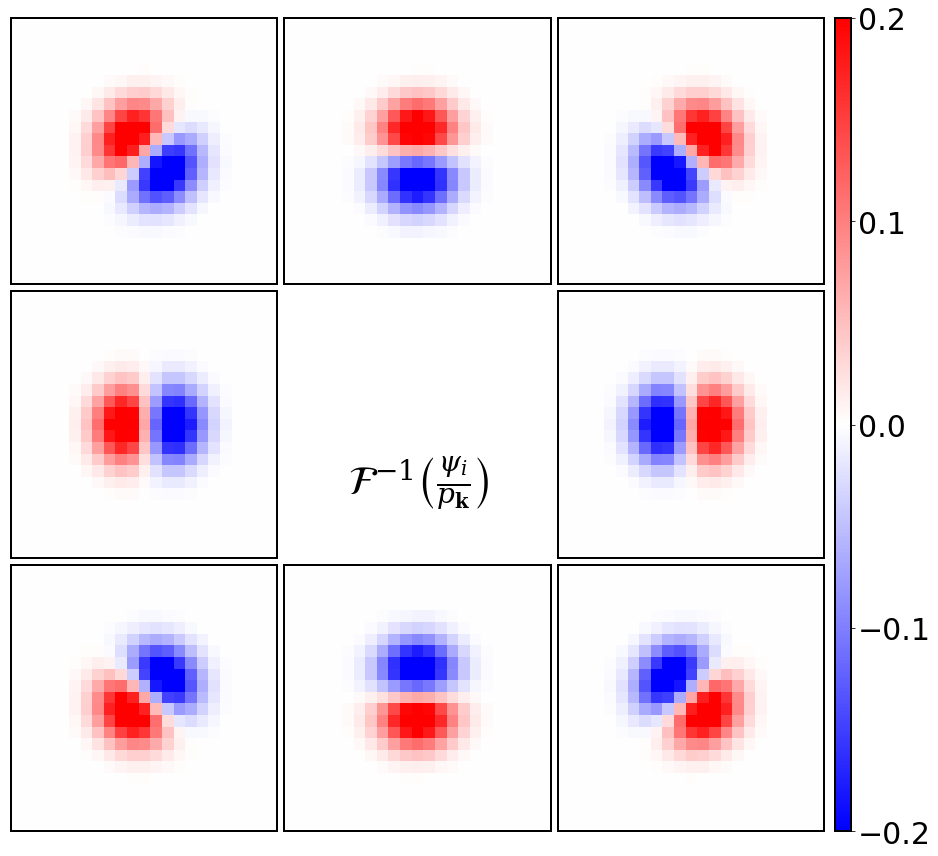

In [19]:
inds=[5,2,1,0,3,6,7,8]
plt.close()
fig=plt.figure(figsize=(13,12))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

for i in range(8):
    ax=grid[inds[i]]
    fun=measTask.Psi[::3][i]
    fun2=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fun/psfFou)).real)*32**2./(0.168)**2.
    im=ax.imshow(fun2,aspect='equal',origin='lower',cmap='bwr',vmin=-0.2,vmax=0.2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.grid(color='black', linestyle='-', linewidth=2)
    #ax.set_title(tlist[i])
    for x in ax.spines.values():
        x.set_linewidth(2.)

grid[4].axis('off')
grid[4].text(5,5,r'$\mathcal{F}^{-1}\left(\frac{\psi_{i}}{p_\mathbf{k}}\right)$',fontsize=40)

cbar=ax.cax.colorbar(im)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_yticks([-0.2,-0.1,0.,0.1,0.2])
gc.collect()
fig.tight_layout()
#fig.savefig('psi_demo.pdf')

fun=measTask.Chi[0]
print('flux scaling is %.3f' %(0.168**3./np.sqrt(np.sum((fun/psfFou)**2.))))

print('FWHM of re-smoothing kernel is: %.3f' %(1./measTask.sigmaF*0.168*2.35))

/var/tmp/pbs.104492.idark/ipykernel_154441/3784411168.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


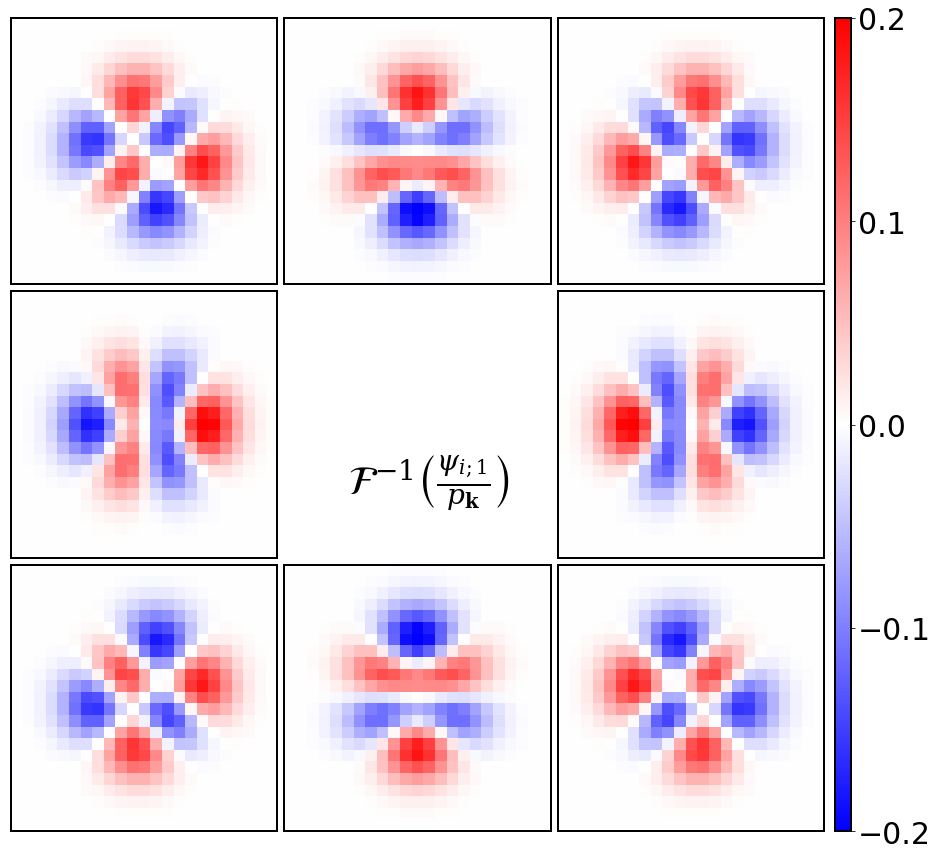

In [20]:
inds=[5,2,1,0,3,6,7,8]
plt.close()
fig=plt.figure(figsize=(13,12))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

for i in range(8):
    ax=grid[inds[i]]
    fun=measTask.Psi[1::3][i]
    fun2=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fun)).real)*32**2./(0.168)**2.
    im=ax.imshow(fun2,aspect='equal',origin='lower',cmap='bwr',vmin=-0.2,vmax=0.2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.grid(color='black', linestyle='-', linewidth=2)
    #ax.set_title(tlist[i])
    for x in ax.spines.values():
        x.set_linewidth(2.)
grid[4].axis('off')
grid[4].text(5.,5,r'$\mathcal{F}^{-1}\left(\frac{\psi_{i;1}}{p_{\mathbf{k}}}\right)$',fontsize=40)

cbar=ax.cax.colorbar(im)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_yticks([-0.2,-0.1,0.,0.1,0.2])
gc.collect()
fig.tight_layout()
fig.savefig('psidg1_demo.pdf')

In [14]:
ngrid       =   64
pixScale    =   0.168
psfFWHM     =   60 # arcsec

# FPFS Basic
beta        =   0.50 # try2
rcut        =   32
beg         =   ngrid//2-rcut
end         =   beg+2*rcut

# PSF
psfFname    =   os.path.join(galDir,'psf-%s.fits' %psfFWHM)
psfData     =   pyfits.open(psfFname)[0].data
npad        =   (ngrid-psfData.shape[0])//2
psfData2    =   np.pad(psfData,(npad+1,npad),mode='constant')
psfData2    =   psfData2[beg:end,beg:end]
measTask    =   fpfs.image.measure_source(psfData2,sigma_arcsec=0.59)
psfFou      =   np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psfData2)))[measTask._indY,measTask._indX]
measTask    =   fpfs.image.measure_source(psfData2,sigma_arcsec=0.45)
psfFou      =   np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(psfData2)))[measTask._indY,measTask._indX]
fun=measTask.Chi[0]
print('flux scaling is %.3f' %(1./np.sum((fun/psfFou*measTask.ngrid**2.*measTask._dk)**2.)))
print('FWHM of re-smoothing kernel is: %.3f arcsec' %(1./measTask.sigmaF*0.168*2.35))

flux scaling is 1.103
FWHM of re-smoothing kernel is: 1.058 arcsec


/var/tmp/pbs.104492.idark/ipykernel_154441/2100665364.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  print('flux scaling is %.3f' %(1./np.sum((fun/psfFou*measTask.ngrid**2.*measTask._dk)**2.)))
